### 서울시 운동을 하지 않는 이유 통계

* 작성목적 : 도시정책지표에 대한 포괄적인 자료구축 및 분석을 실시함으로써 \
서울의 현재 상태에 대한 객관적이고 심층적인 분석과 현재 도시발전 수준을 \
모니터링 하는 한편, 시정의 변화에 따른 시민과 기업의 입장에서 느끼는 \
정책의 실효성을 객관적으로 측정하여 보다 발전된 정책의 방향을 \
제시하는데 목적이 있음

* 조사지역 : 서울시 및 자치구

* 조사내용 : 서울시민의 운동을 하지 않는 이유에 대한 비율 성별ㆍ연령별ㆍ지역별 등)

* 데이터출처 : 서울 열린데이터 광장(https://data.seoul.go.kr/)

In [13]:
import pandas as pd

# 2019년도 데이터
not_exercise2019 = pd.read_csv('data/reason_not_exercise2019.csv')
not_exercise2019.drop(columns = '기간', inplace = True)
not_exercise2019.head()

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
0,서울시,서울시,46.8,5.0,4.3,37.3,5.2,1.4
1,성별,남자,52.4,4.4,4.9,32.4,4.9,1.1
2,성별,여자,42.5,5.6,3.9,41.0,5.4,1.7
3,연령별,10대,55.3,4.8,3.9,32.6,3.5,-
4,연령별,20대,46.0,4.2,4.5,38.8,6.4,0.1


In [14]:
# 원본 데이터 손상 방지
not_ex_sex = not_exercise2019[not_exercise2019['대분류'] == '성별'].copy()

# 필요 없는 컬럼 제거
not_ex_sex.drop(columns = '대분류', inplace = True)

# 데이터의 인덱스를 '분류' 컬럼으로 변경
not_ex_sex.set_index('분류', inplace = True)

not_ex_sex

,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
분류,,,,,,
남자,52.4,4.4,4.9,32.4,4.9,1.1
여자,42.5,5.6,3.9,41.0,5.4,1.7


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc

# 그래프 한글깨짐 방지
plt.rcParams['axes.unicode_minus'] = False
f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = f_path).get_name()
rc('font', family = font_name, size = 16)

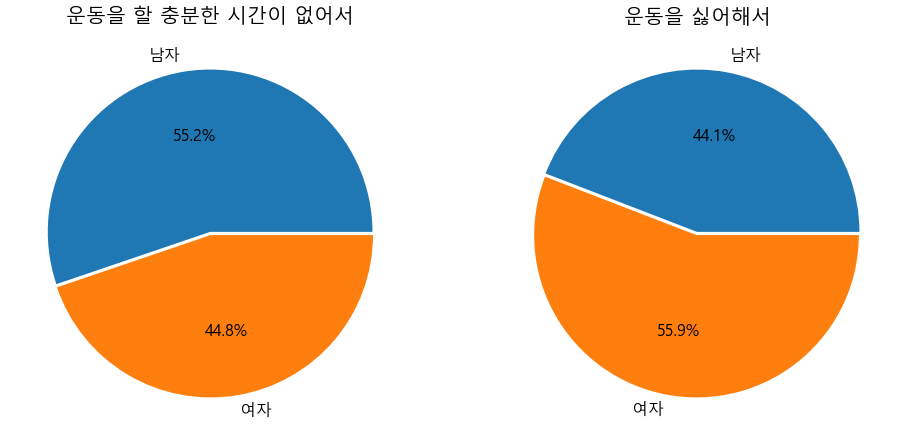

In [26]:
# 가장 높은 응답을 보인 두 카테고리에 대한 성별의 비율
f, ax = plt.subplots(1, 2, figsize = (16, 8))
not_ex_sex['운동을 할 충분한 시간이 없어서'].plot.pie(explode = [0, 0.02], ax = ax[0], autopct = '%1.1f%%')
ax[0].set_title('운동을 할 충분한 시간이 없어서', fontsize = 20)
ax[0].set_ylabel('')

not_ex_sex['운동을 싫어해서'].plot.pie(explode = [0, 0.02], ax = ax[1], autopct = '%1.1f%%')
ax[1].set_title('운동을 싫어해서', fontsize = 20)
ax[1].set_ylabel('')

plt.show()

* 2019년 조사결과 위 두 조건이 비율이 가장 높았고, 성별에 따라 차이를 알 수 있다.
* 남성은 여성에 비해 시간핑계가 많았고, 여성은 남성에 비해 운동을 싫어하는 인원이 더 많았다.

In [29]:
# 연령대에 따른 차이
not_ex_age = not_exercise2019[not_exercise2019['대분류'] == '연령별'].copy()
not_ex_age.drop(columns = '대분류', inplace = True)
not_ex_age.set_index('분류', inplace = True)
not_ex_age

,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
분류,,,,,,
10대,55.3,4.8,3.9,32.6,3.5,-
20대,46.0,4.2,4.5,38.8,6.4,0.1
30대,59.9,5.2,2.9,27.3,4.5,0.2
40대,54.1,3.9,2.9,35.5,3.3,0.4
50대,46.1,6.2,4.5,36.8,5.6,0.8
60대 이상,26.6,6.0,6.6,48.7,6.6,5.6


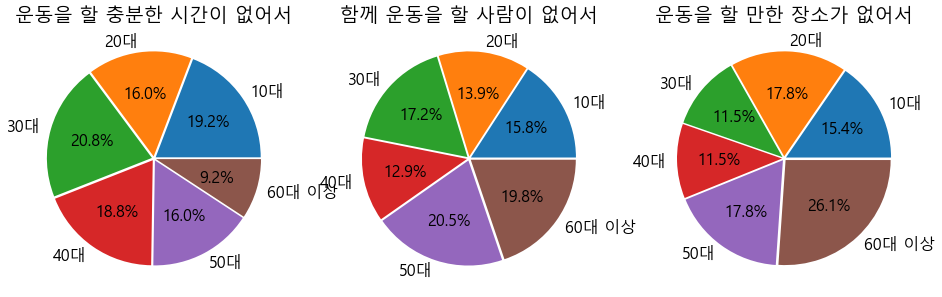

In [30]:
f, ax = plt.subplots(1, 3, figsize = (16, 8))

explode_setting = [0.02, 0.02, 0.02, 0.02, 0.02, 0.02]

not_ex_age['운동을 할 충분한 시간이 없어서'].plot.pie(explode = explode_setting, ax = ax[0], autopct = '%1.1f%%')
ax[0].set_title('운동을 할 충분한 시간이 없어서')
ax[0].set_ylabel('')

not_ex_age['함께 운동을 할 사람이 없어서'].plot.pie(explode = explode_setting, ax = ax[1], autopct = '%1.1f%%')
ax[1].set_title('함께 운동을 할 사람이 없어서')
ax[1].set_ylabel('')

not_ex_age['운동을 할 만한 장소가 없어서'].plot.pie(explode = explode_setting, ax = ax[2], autopct = '%1.1f%%')
ax[2].set_title('운동을 할 만한 장소가 없어서')
ax[2].set_ylabel('')

plt.show()

* 직장에서 대부분의 시간을 보내는 30~40대의 경우 시간이 가장 부족했고, \
결혼 후 지인들과 연락이 뜸해지는 50대 이상은 운동 파트너의 부재의 비율이 높았고, \
최근 각종 체육시설 등이 온라인 예약제로 사용가능한 것에 영향을 받아 \
스마트폰 등에 익숙하지 않은 60대 이상은 장소섭외를 어려움으로 꼽았다.